## Лабораторная работа №7
Написать собственую реализацию Rejection sampling и metropolis gasting

Применить для 1-2 функций плотности и поспроить график сэмплирования точки и линий уровня (можно пользоваться нормальными или равномерными генераторами)

In [1]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from PIL import Image

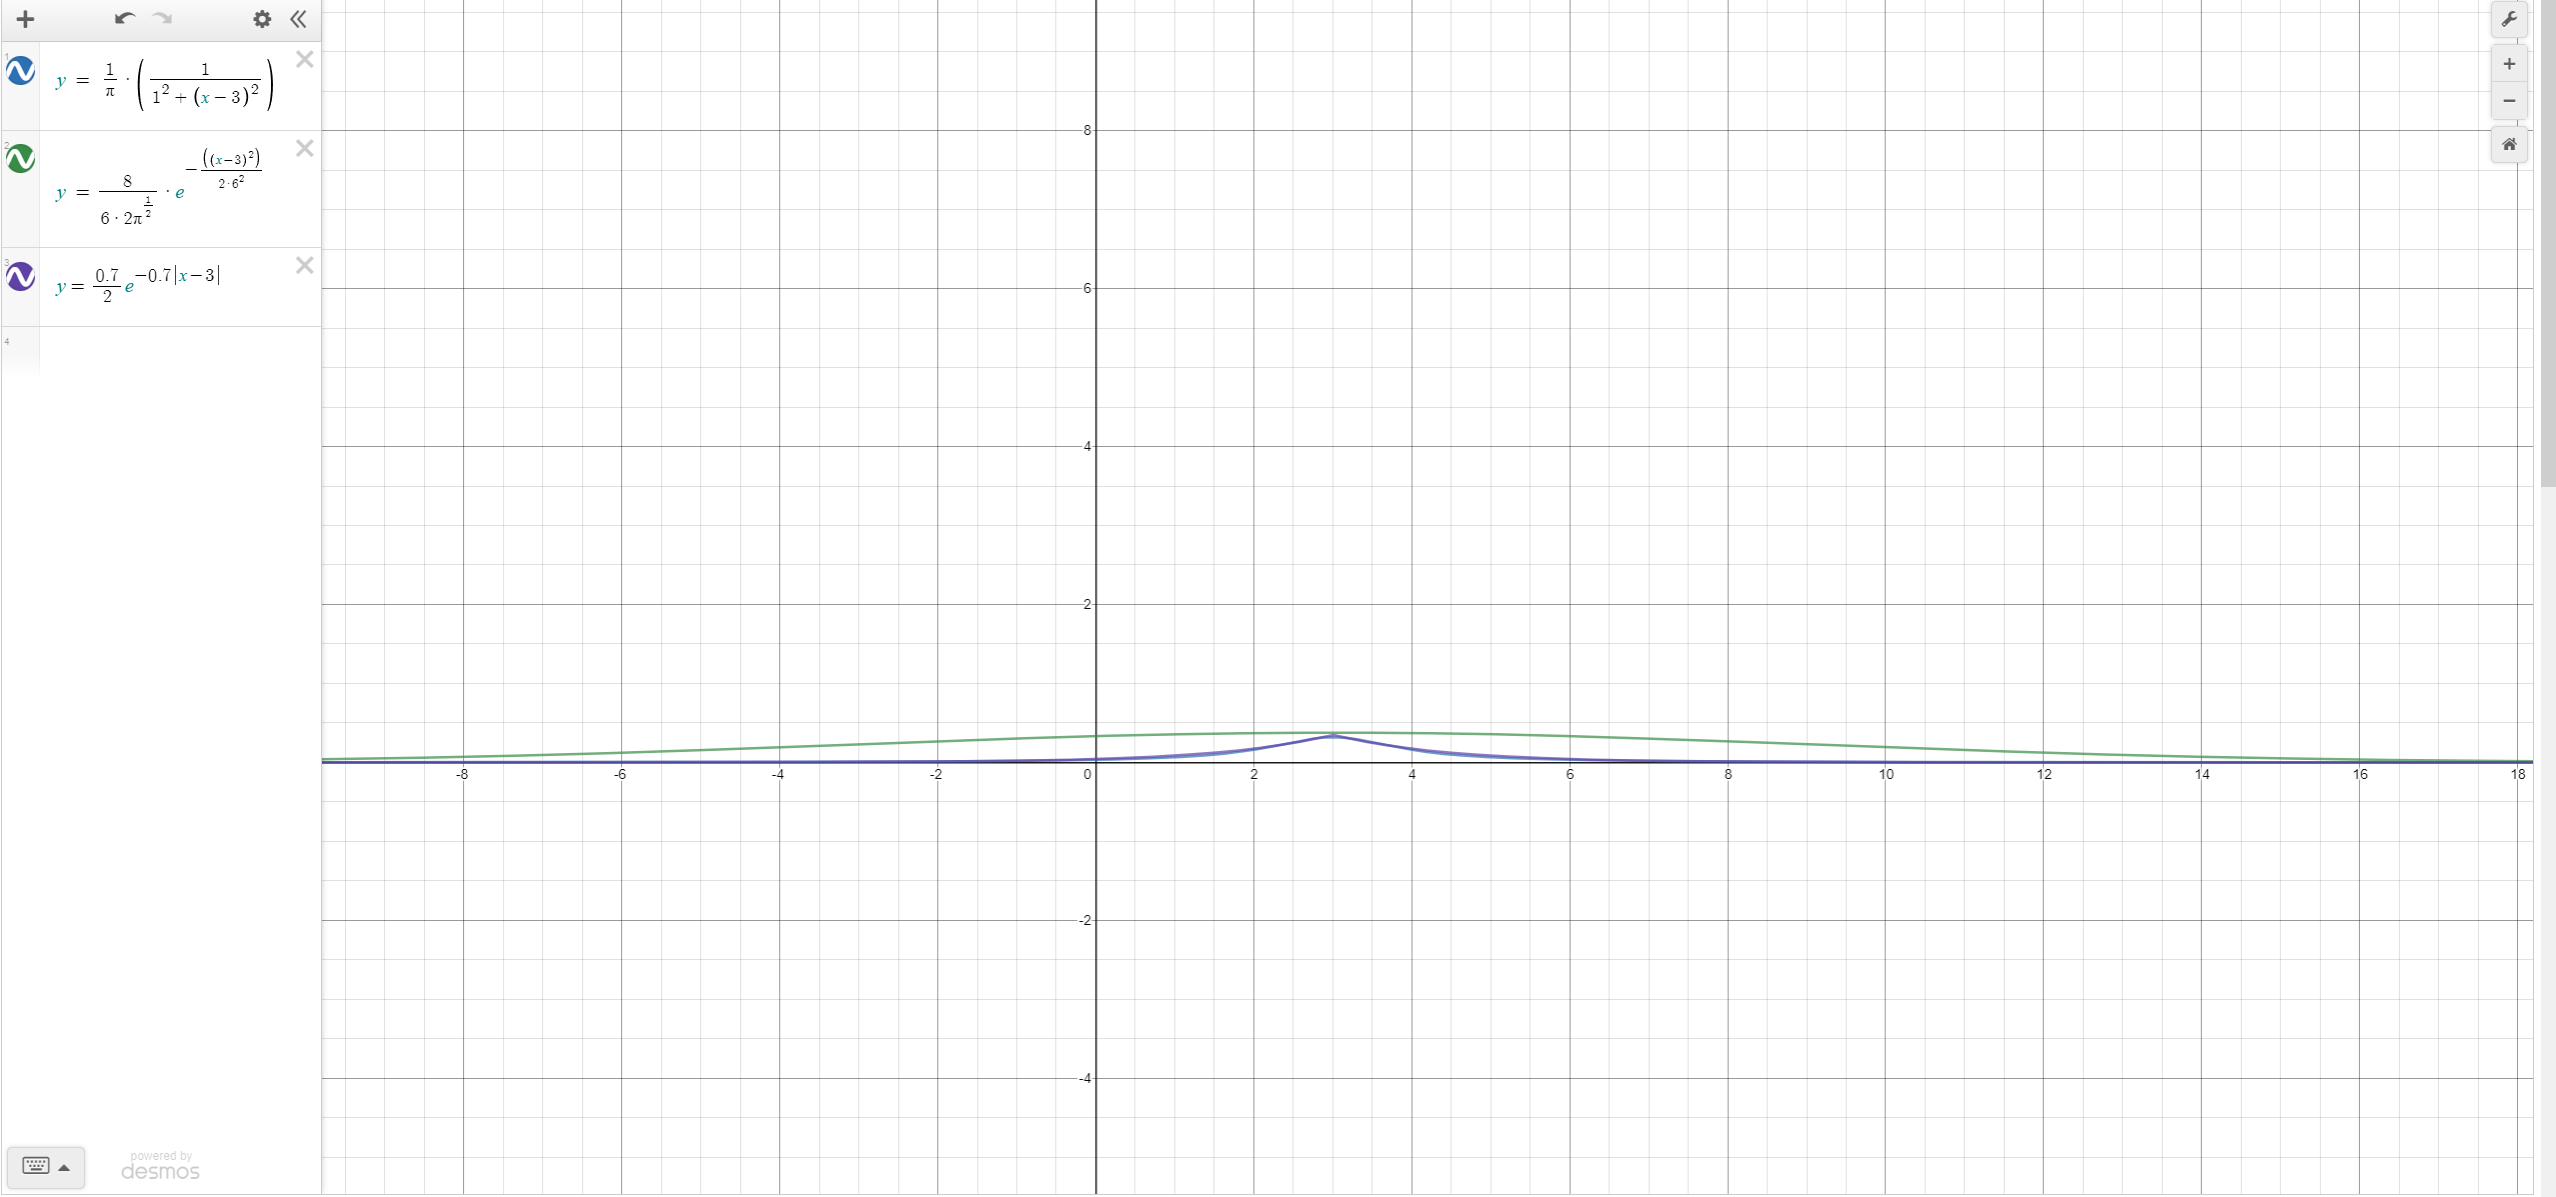

In [2]:
img = Image.open('CauchyAndLaplace.png')
display(img)

## Распределение Коши
$F(x) = \frac{1}{\pi} \left(\frac{\gamma}{\gamma^2 + (x-x_0)^2}\right)$
## В нашем случае
$\frac{1}{\pi}\cdot\left(\frac{1}{1^2+\left(x-3\right)^2}\right)$

In [3]:
def Cauchy(x):
    '''
    Распределение Коши
    m - мат ожидание
    d - дисперсия
    выводит случайное число в этом распределении
    '''
    m=1
    d=3
    return 8*1/math.pi*(d/(d**2+(x-m)**2))


## Распределение Лапласа
$F(x) = \frac{a}{2}e^{-a\left|x-b\right|}$
## В нашем случае
$\frac{0.7}{2}e^{-0.7\left|x-3\right|}$

In [4]:
def Laplace(x):
    '''
    Распределение Лапласа
    m - мат ожидание
    d - дисперсия
    выводит случайное число в этом распределении
    '''
    m=0.7
    d=3
    return (m/2)*math.e**(-m*abs(x-d))

## При нормальном распределении
$8\cdot\frac{1}{6\cdot2\pi^{\frac{1}{2}}}\cdot e^{-\frac{\left(x-3\right)^2}{2\cdot6^2}}$

## Rejection sampling

In [5]:
def Rej_samp(n,f,a,b,c):
    '''
    Реализация Rejection Sampling
    N - количество точек (int)
    f - функция
    a - Начало отрезка (int)
    b - Конец отрезка (int)
    c - высота(int)
    выводит координаты двух множеств точек, попадающих во множество и вне его соотвественно
    '''

    in_x=[]
    in_y=[]
    out_x=[]
    out_y=[]
    while len(in_x) < n:
        x = np.random.rand() * (b-a) + a
        y = np.random.rand() * c
        if y < f(x):
            in_x.append(x)
            in_y.append(y)
        else:
            out_x.append(x)
            out_y.append(y)
    return in_x, in_y, out_x, out_y

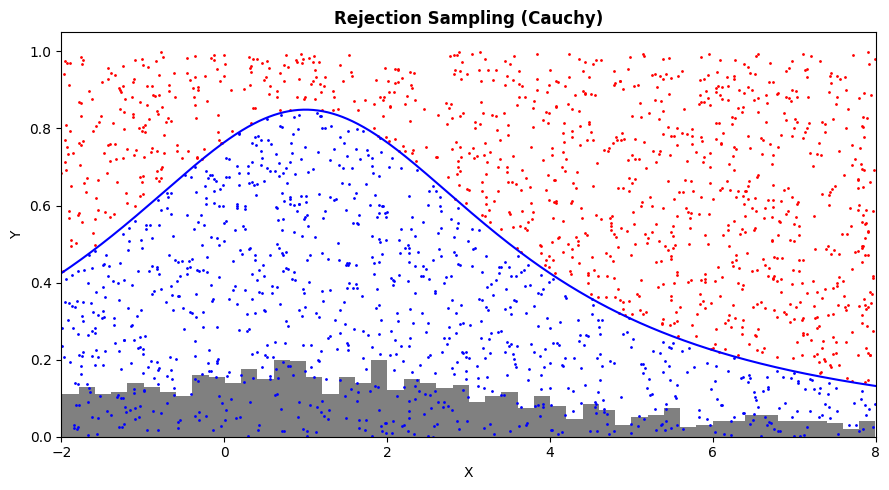

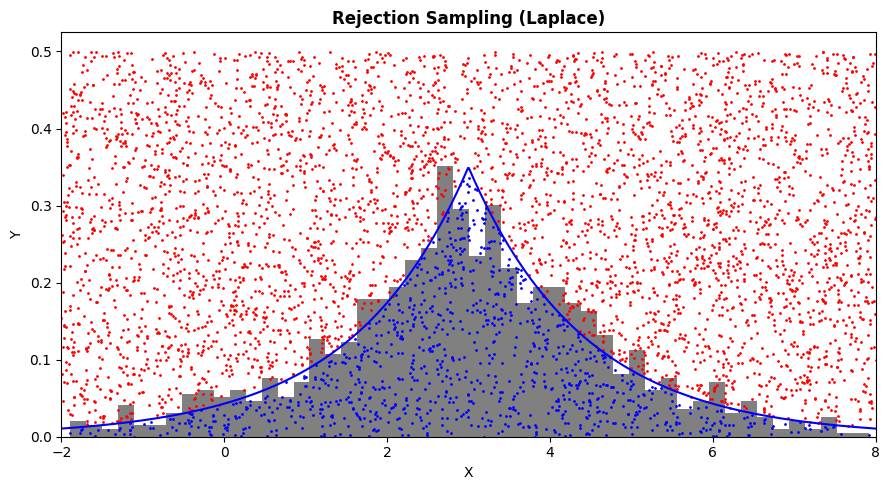

In [6]:
grid_points = 1000
min, max = -2, 8
# Изобразим график 1
x = np.linspace(min, max, grid_points)
y = Cauchy(x)

in_x, in_y, out_x, out_y = Rej_samp(1000,Cauchy, min, max, 1)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(in_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции
ax.scatter(in_x, in_y, s=1,color = "blue")
ax.scatter(out_x, out_y, s=1, color = "red")

# Оформление
ax.set_xlim((min, max))
ax.set_title('Rejection Sampling (Cauchy)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
x = np.linspace(min, max, grid_points)
y = Laplace(x)

in_x, in_y, out_x, out_y = Rej_samp(1000,Laplace, min, max, 0.5)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(in_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции
ax.scatter(in_x, in_y, s=1,color = "blue") 
ax.scatter(out_x, out_y, s=1, color = "red")

# Оформление
ax.set_xlim((min, max))
ax.set_title('Rejection Sampling (Laplace)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

## Metropolis hastings

In [7]:
def Metr_Hast(n,f,x0):
    '''
    Реализация Metropolis Hastings
    N - количество точек (int)
    f - функция
    x0 - начальная точка
    выводит плотность точек на координату...?
    '''

    x=[x0]
    while len(x) < n:
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        ratio = f(x_next)/f(x_prev)
        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)
    return x

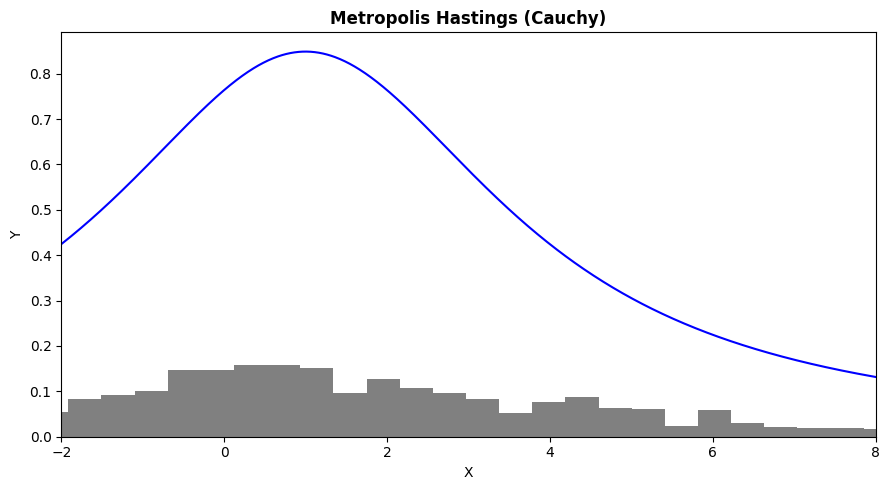

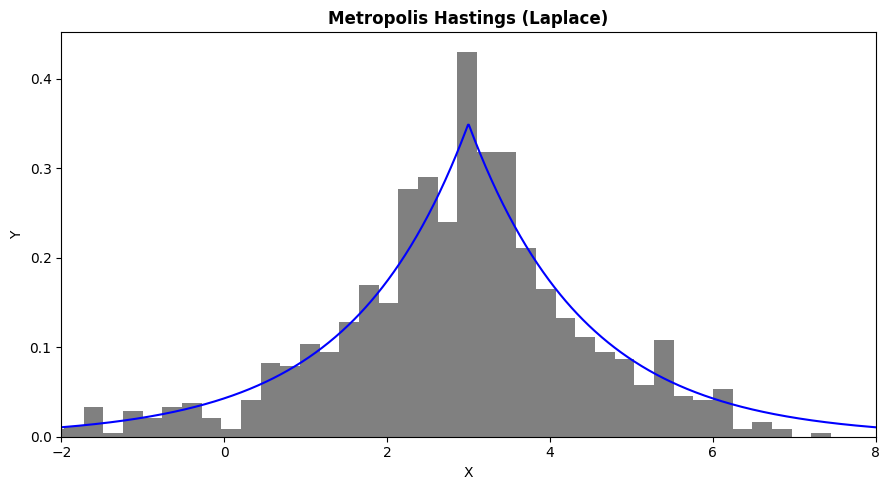

In [8]:
# Изобразим график 1
x = np.linspace(min, max, grid_points)
y = Cauchy(x)

MH_x = Metr_Hast(1000, Cauchy, 1)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции

# Оформление
ax.set_xlim((min, max))
ax.set_title('Metropolis Hastings (Cauchy)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
x = np.linspace(min, max, grid_points)
y = Laplace(x)

MH_x = Metr_Hast(1000, Laplace, 1)

points = np.zeros((1000))

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции

# Оформление
ax.set_xlim((min, max))
ax.set_title('Metropolis Hastings (Laplace)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()